## (一) 连接与测试

#### 1. 创建一个手柄对象 ``joyconrobotics_right``，自动姿态校准和初始化，请将手柄水平放置在桌面上静止

In [ ]:
from joyconrobotics import JoyconRobotics

joyconrobotics_right = JoyconRobotics("left")

connect to left joycon successful.
calibrating(4 seconds)..., please place it horizontally on the desktop.
Joycon calibrations is complete.


#### 2. 可视化操作适应

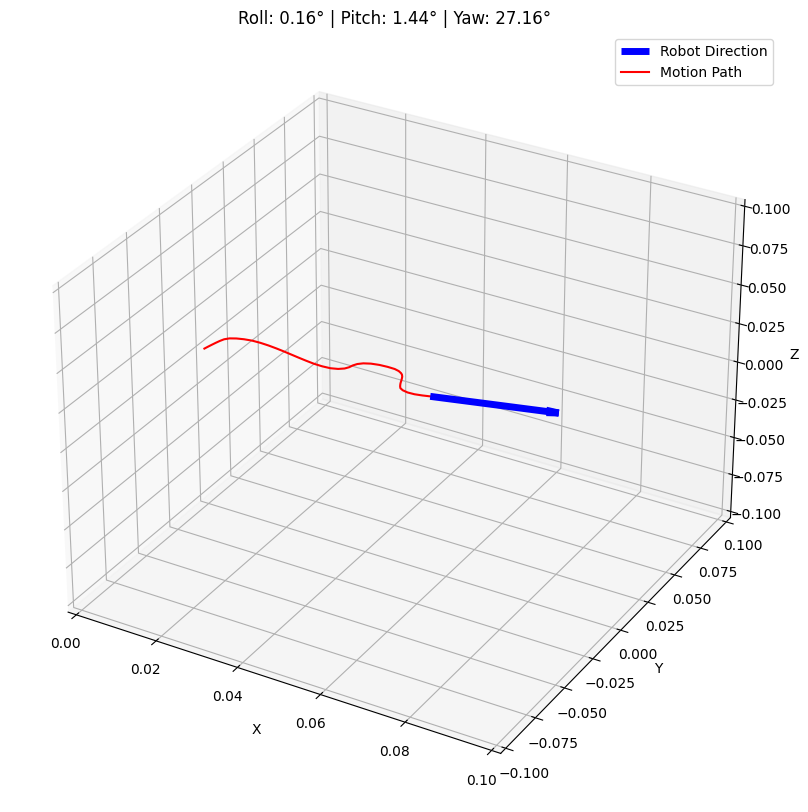

你按下了 x 按键，程序结束


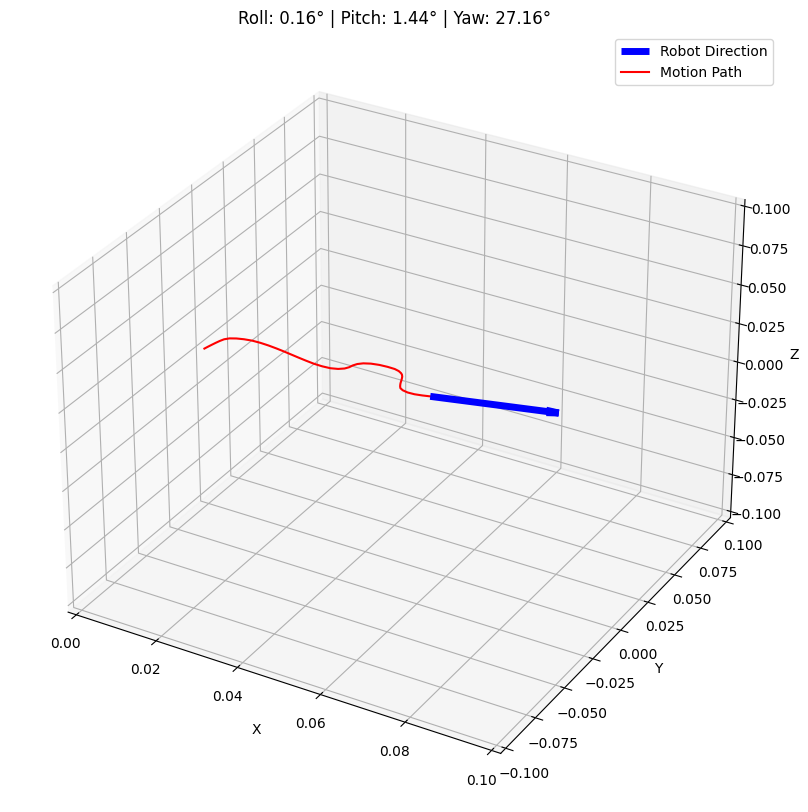

In [8]:
import math
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from glm import vec2, vec3, quat, angleAxis, eulerAngles
from joyconrobotics import JoyconRobotics

joyconrobotics_right = JoyconRobotics("right")

# 创建波形图
plt.ion()  # 开启交互模式
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 初始化数据容器
time_data = []
direction_data = [[], [], []]  # 分为三个子数据（假设direction包含三个值）
history_x, history_y, history_z = [], [], []  # 用来记录运动历史的坐标

max_time = 10  # 数据显示的最大时间范围（单位：秒）
x, y, z = 0, 0, 0

for i in range(1000):  # 持续获取数据并更新图形
    time_data.append(i * 0.05)  # 时间数据

    pose, gripper = joyconrobotics_right.update()
    x = pose[0]
    y = pose[1]
    z = pose[2]
    direction_data[0].append(pose[3])  # Roll
    direction_data[1].append(pose[4])  # Pitch
    direction_data[2].append(pose[5])  # Yaw
    
    # 限制显示的数据长度
    if len(time_data) > max_time / 0.05:
        time_data = time_data[-int(max_time / 0.05):]
        direction_data[0] = direction_data[0][-int(max_time / 0.05):]
        direction_data[1] = direction_data[1][-int(max_time / 0.05):]
        direction_data[2] = direction_data[2][-int(max_time / 0.05):]
    
    # 清除上一帧内容
    clear_output(wait=True)

    # 获取当前的roll, pitch, yaw（单位为弧度），并转换为角度
    roll, pitch, yaw = direction_data[0][-1], direction_data[1][-1], direction_data[2][-1]
    # yaw = -yaw # for the UI
    
    roll_deg = math.degrees(roll) # 转换为角度
    pitch_deg = math.degrees(pitch)
    yaw_deg = math.degrees(yaw)

    # 计算朝向的方向向量（可以通过旋转矩阵将roll, pitch, yaw应用于方向向量）
    direction_vector = vec3(
        math.cos(pitch) * math.cos(yaw),
        math.cos(pitch) * math.sin(yaw),
        math.sin(pitch))
    
    # 绘制朝向的方向矢量（粗箭头）
    ax.clear()  # 清除之前的图像
    # ax.quiver(x, y, z, direction_vector[0], direction_vector[1], direction_vector[2], length=0.02, color='b', label='Robot Direction', linewidth=5, arrow_length_ratio=0.01)
    
    ax.quiver(x, y, z, direction_vector[0], direction_vector[1], direction_vector[2], 
          length=0.03, color='b', label='Robot Direction', linewidth=5, arrow_length_ratio=0.1)


    # 记录当前位置
    history_x.append(x)
    history_y.append(y)
    history_z.append(z)
    
    # 绘制历史轨迹
    ax.plot(history_x, history_y, history_z, color='r', alpha=1, label='Motion Path')

    # 设置轴标签
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Roll: {roll_deg:.2f}° | Pitch: {pitch_deg:.2f}° | Yaw: {yaw_deg:.2f}°')

    # 设置图形显示范围
    ax.set_xlim([ 0.0, 0.1])
    ax.set_ylim([-0.1, 0.1])
    ax.set_zlim([-0.1, 0.1])
    
    ax.legend(loc='upper right')
    
    # 显示图形
    display(fig)
    
    # 关闭按键
    if joyconrobotics_right.button.get_button_x() == 1:
        print('你按下了 x 按键，程序结束')
        break
    
    # 暂停一段时间，模拟实时数据获取
    time.sleep(0.01)

plt.ioff()  # 关闭交互模式

----

## (二) 更多数据

#### 1. 观察 Orientation 波形图

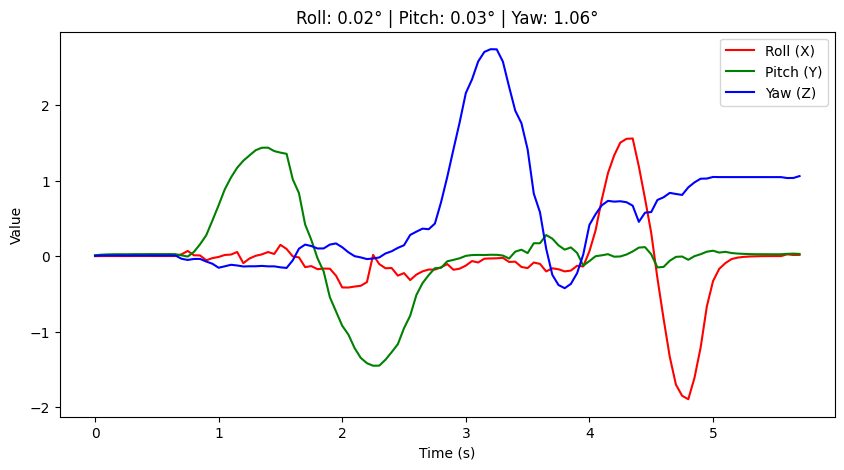

你按下了 x 按键，程序结束


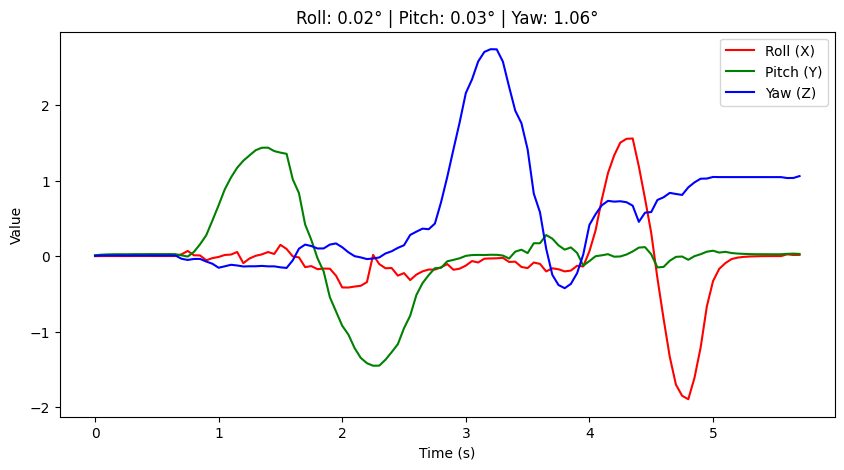

In [2]:
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

from joyconrobotics import JoyconRobotics

joyconrobotics_right = JoyconRobotics("right")

# 创建波形图
plt.ion()  # 开启交互模式
fig, ax = plt.subplots(figsize=(10, 5))

# 初始化数据容器
time_data = []
direction_data = [[], [], []]  # 分为三个子数据（假设direction包含三个值）

# 设置显示的时间范围
max_time = 10  # 数据显示的最大时间范围（单位：秒）

for i in range(1000):  # 持续获取数据并更新图形
    # 获取数据
    time_data.append(i * 0.05)  # 时间数据
    
    pose, gripper = joyconrobotics_right.update()
    
    direction_data[0].append(pose[3])  
    direction_data[1].append(pose[4])  
    direction_data[2].append(pose[5])  
    
    # 限制显示的数据长度
    if len(time_data) > max_time / 0.05:
        time_data = time_data[-int(max_time / 0.05):]
        direction_data[0] = direction_data[0][-int(max_time / 0.05):]
        direction_data[1] = direction_data[1][-int(max_time / 0.05):]
        direction_data[2] = direction_data[2][-int(max_time / 0.05):]
    
    # 清除上一帧内容
    clear_output(wait=True)

    # 绘制波形图
    ax.clear()
    ax.plot(time_data, direction_data[0], label='Roll (X)', color='r')  # Roll (X轴)，红色 [-0.6, +0.6] ，正面朝上的时候是 +0.6，- 0.6交叉
    ax.plot(time_data, direction_data[1], label='Pitch (Y)', color='g')  # Pitch (Y轴)，绿色
    ax.plot(time_data, direction_data[2], label='Yaw (Z)', color='b')  # Yaw (Z轴)，蓝色 并不会累计
    
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Value')
    ax.legend(loc='upper right')
    ax.set_title(f'Roll: {direction_data[0][-1]:.2f}° | Pitch: {direction_data[1][-1]:.2f}° | Yaw: {direction_data[2][-1]:.2f}°')
    
    # 显示图形
    display(fig)
    
    if joyconrobotics_right.listen_button('home') == 1:
      joyconrobotics_right.reset_joycon()
      
    # 关闭按键
    if joyconrobotics_right.button.get_button_x() == 1:
        print('你按下了 x 按键，程序结束')
        break
    
    # 暂停一段时间，模拟实时数据获取
    time.sleep(0.001)


plt.ioff()  # 关闭交互模式

#### 2. 读取位姿和夹爪控制（单击扳机 => 切换控制状态）

In [4]:
import time

# 姿态获取
while 1:
    clear_output(wait=True)
    
    posture, gripper_status = joyconrobotics_right.update()
    print("posture:", [f"{x:.3f}" for x in posture], f'{gripper_status=}')
    
    # 关闭按键
    if joyconrobotics_right.button.get_button_x() == 1:
        print('你按下了 x 按键，程序结束')
        break
    
    time.sleep(0.1)

posture: ['0.001', '0.000', '0.000', '0.037', '0.019', '-0.093'] gripper_status=1
你按下了 x 按键，程序结束


#### 3. 自定义按键

In [3]:
# 程序说明，不断检测右边手柄的按键状态，当按下 右边手柄扳机键r 时，结束程序循环。
# right: r, zr, y, x, a, b, plus, r-stick, home, sr, sl
# left: l, zl, left, up, right, down, minis, r-stick, capture, sr, sl


import time
from joyconrobotics import JoyconRobotics
joyconrobotics_right = JoyconRobotics("right",with_calibrate=False)

while 1:
  r_button_status = joyconrobotics_right.listen_button('r', show_all=True) # show_all 监听所有按键状态的变换
  
  if r_button_status or joyconrobotics_right.button.get_button_x() == 1:
    print('你按下了 扳机键r 或者 x 按键，程序结束')
    break

  time.sleep(0.1)

detect right joycon_id=(1406, 8199, '9c:54:00:e0:7f:16')
connect to right complete.

b 1
b 0
a 1
a 0
y 1
y 0
x 1
你按下了 扳机键r 或者 x 按键，程序结束


---

#### 结语：

祝你玩得愉快！ 盒子桥 2025年1月13日 版权所有